1. K Nearest Neighbors is a classification algorithm that operates on a very simple principle.

Training Algorithm:

1. Store all the data

Prediction Algorithm:

1. Calculate the distance from x to all points in our data.
2. Sort the points in our data by increasing distance from x.
3. Predict the majority label of the k closest points.

Choosing a K will affect what class a new point is assigned to. If we choose a larger K value we smooth out and create more bias in our model i.e we get a cleaner cut off at the cost of mis-labelling some points.

Pros:

1. Very simple
2. Training is trivial
3. Works with any number of classes
4. Easy to add more data
5. k and distance metrics are the few parameters.

Cons:

1. High prediction cost(worse for large datasets)
2. Not good with high dimensional data
3. Categorical Features don't work well

A common interview task for a data scientist is to be given an anonymized data and attempt to classify it witgout knowing the context of the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [5]:
df=pd.read_csv('Classified Data',index_col=0)

In [6]:
df.head()
#this is just an anonymized classified data so we don't know what any of these numbers represent or what the column 
#names represent. We just know that we need to use these features that are unknown to us to what they actually represent
#in order to predict the target class 1 or 0.

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
#Because the KNN classifier predicts the class of the given test observation by identifying the observations that are
#nearest to it. The scale of the variable actually matters a lot. And any variables that are on a large scale will have a 
#much larger effect on distance between observations.
#And because of this when we use KNN as a classifier we need to standardize everything to the same scale.
#Luckily Scikit learn has a lot of built in tools to help us through this process.
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
#we want to fit this scaler to the data not the actual target class.

StandardScaler()

In [11]:
#now we can use this scaler object to do the transformation
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
#tranform method just performs the standardization by centering and scaling

In [12]:
scaled_features
#we have the array of values and these are the scaled versions of the actual values
#it always a good idea to do standard scaling and transformation on the data

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
#we are going to use that scaled features variable to recreate a feature dataframe
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [14]:
df_feat.head()
#now we have standardized version of our data and now our data is ready to be put into a machine learning algorithm such as
#KNN, which really depends upon the distance between each feature

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [15]:
#now since data is ready we move to train test split
from sklearn.model_selection import train_test_split

In [16]:
X=df_feat
y=df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
#now it is time to use K nearest neighbors. And remember we are trying to come up with a model to predict whether someone
#will be inside the target class or not.
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn=KNeighborsClassifier(n_neighbors=1)    #k=1

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred=knn.predict(X_test)

In [21]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


In [24]:
#as shown above our model is pretty good actually with k=1. But we are going to explore if we can squeeze even more from 
#our model by choosing an even better k value.
#We are going to use elbow method to choose correct k value.

In [25]:
error_rate=[]
#now what we are going to do os basically iterate many models using many different k values and plot out their error rate
#and see which one has the lowest error rate.

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))   #that essentially is just the avg error rate. Avg of where are our predictions are not equal to actual test values

In [26]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [27]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error Rate')

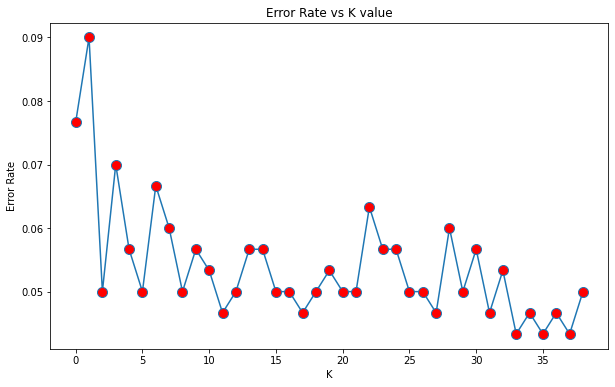

In [29]:
plt.figure(figsize=(10,6))
plt.plot(error_rate,marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

#the above elbow method to chose best k values comes with a cost that we have to run all the models and plot them all out

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.95      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



[[152   7]
 [  7 134]]
